In [1]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import seaborn as sns
from matplotlib import pylab

sns.set()

In [3]:
# Load dataset
df = pd.read_csv('Data_Acq.csv').drop(['Unnamed: 0'],axis=1)
df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Description,CancelledOrder,InternationalOrders,TotalPrice
0,489434,85048,12,2009-12-01 07:45:00,6.95,C13085,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,0,0,83.4
1,489434,79323P,12,2009-12-01 07:45:00,6.75,C13085,United Kingdom,PINK CHERRY LIGHTS,0,0,81.0
2,489434,79323W,12,2009-12-01 07:45:00,6.75,C13085,United Kingdom,WHITE CHERRY LIGHTS,0,0,81.0
3,489434,22041,48,2009-12-01 07:45:00,2.10,C13085,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE",0,0,100.8
4,489434,21232,24,2009-12-01 07:45:00,1.25,C13085,United Kingdom,STRAWBERRY CERAMIC TRINKET BOX,0,0,30.0


## Exploratory Data Analysis

In [4]:
df.head(2)

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Description,CancelledOrder,InternationalOrders,TotalPrice
0,489434,85048,12,2009-12-01 07:45:00,6.95,C13085,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,0,0,83.4
1,489434,79323P,12,2009-12-01 07:45:00,6.75,C13085,United Kingdom,PINK CHERRY LIGHTS,0,0,81.0


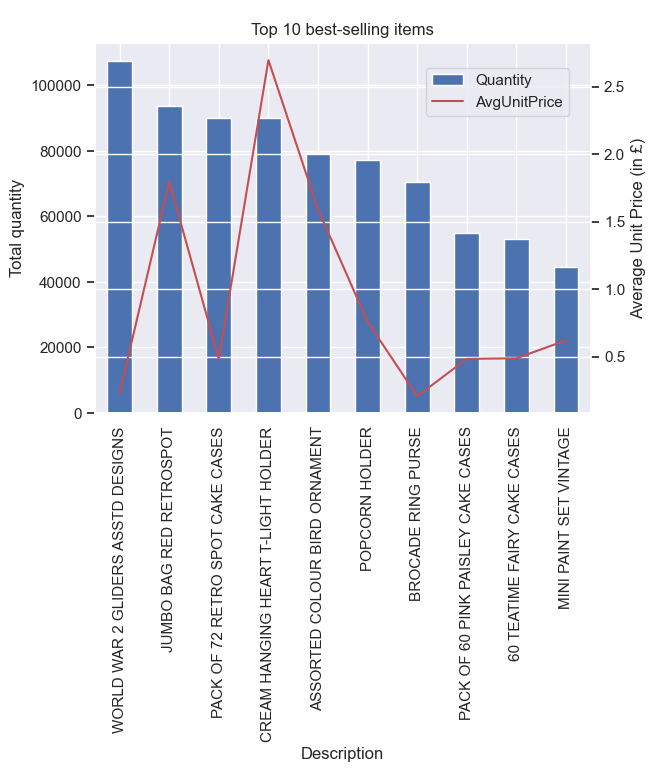

In [5]:
# Find the 10 best-selling items

Top10Qty = df.groupby('Description',as_index=False)[['Quantity','TotalPrice']].sum().sort_values(by='Quantity',
                                                                                               ascending=False).head(10)
Top10Qty['AvgUnitPrice'] = Top10Qty.TotalPrice/Top10Qty.Quantity

# Plot top 10 most popular items

ax = Top10Qty.plot(x="Description", y="Quantity", legend=False,kind='bar')
ax2 = ax.twinx()
Top10Qty.plot(x="Description", y="AvgUnitPrice", ax=ax2, legend=False, color="r")
ax.figure.legend(loc=(.65,.85))
plt.title('Top 10 best-selling items')
ax.set_ylabel('Total quantity')
ax2.set_ylabel('Average Unit Price (in £)')
plt.show()

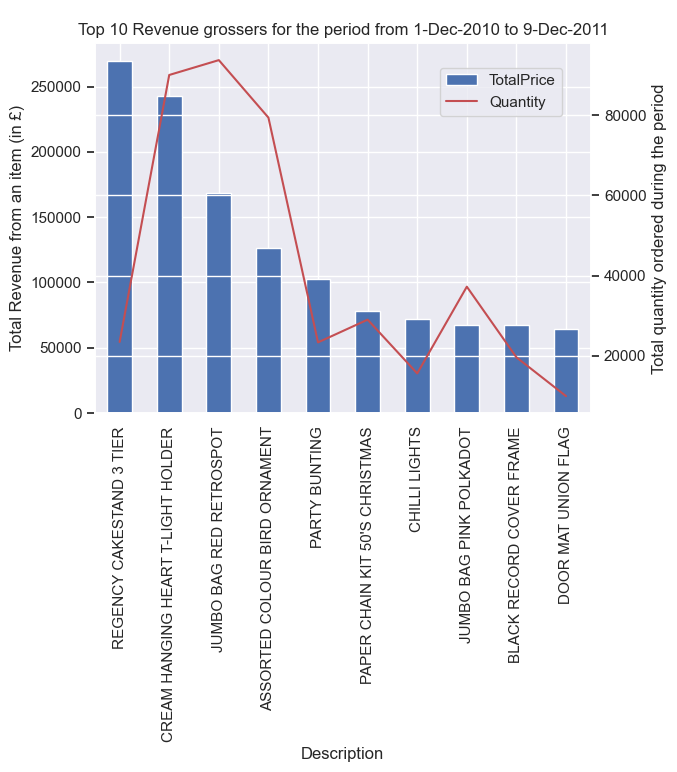

In [6]:
# Top 10 revenue grossing items

Top10Rev = df.groupby('Description',as_index=False)[['TotalPrice','Quantity']].sum().sort_values(by='TotalPrice',
                                                                                               ascending=False).head(10)
Top10Rev['AvgUnitPrice'] = Top10Rev.TotalPrice/Top10Rev.Quantity

# Total Revenue
TotalRev = round(df.TotalPrice.sum(),0)

# Plot top 10 revenue grossers
ax = Top10Rev.plot(x="Description", y="TotalPrice", legend=False,kind='bar')
ax2 = ax.twinx()
Top10Rev.plot(x="Description", y="Quantity", ax=ax2, legend=False, color="r")
# ax.axhline(TotalRev, c='k', ls='--')
ax.figure.legend(loc=(.65,.85))
plt.title('Top 10 Revenue grossers for the period from 1-Dec-2010 to 9-Dec-2011')
ax.set_ylabel('Total Revenue from an item (in £)')
ax2.set_ylabel('Total quantity ordered during the period')
plt.show()

In [7]:
# Number of unique items and customers

print(len(df['Description'].unique()))
print(len(df['Customer ID'].unique()))

4602
5890


### Pareto Principle

The Pareto principle (also known as the 80/20 rule) states that, for many events, roughly 80% of the effects come from 20% of the causes.(Source: wikipedia)

For a sales entity, Pareto pinciple could suggest that 80% sales of a company comes from 20% of its products and/or 80% of its sales comes from 20% of its customers.

Our online retail store has 3652 unique items for sale, and 4357 unique customers for the period from Dec 1 2010 to Dec 9 2011. Here, Pareto principle is of value because instead of focussing on such a huge number of items and customers, the company needs to just focus on 20% of these in order to effect 80% of its sales.

Let us check the applicability of Pareto principle for our dataset.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.graph_objs import Bar, Scatter, Layout, Font
from plotly.offline import iplot

def applyPareto(df,column_20, measure):
    '''
    Checks the contribution of 20% of a cause to 80% of sales revenue
     ----------------
    Input:
        df: dataset on which Pareto principle is to be checked
        column_20: column to be checked for 20% of its unique entries to affect 80% of sales
        measure: string - the measure that is conributing to 80%
    ----------------
    '''
    pareto_df = df.groupby(column_20,as_index=False)['TotalPrice'].sum().sort_values(by='TotalPrice', ascending=False)
    pareto_df['cumulative_sum'] = pareto_df.TotalPrice.cumsum()
    pareto_df['cumulative_perc'] = 100*pareto_df.cumulative_sum/pareto_df.TotalPrice.sum()
    
    item_perc = round(len(pareto_df[(pareto_df.cumulative_perc)<80])/len(pareto_df)*100)

    print(item_perc,'% of',measure,'contribute to 80% of sales')
    print(item_perc,'% means',round(item_perc/100*len(pareto_df)),measure)
    
    plotPareto(pareto_df, column_20,measure)
    
def plotPareto(pareto_df,column_20,measure):
    '''
    Displays applicability of Pareto Principle on a dataset
    '''
    # Graphical representation of Pareto Principle
    pareto_df['demarcation'] = 80
    pareto_threshold = int(len(pareto_df)*.20)


    trace1 = Bar(x=pareto_df[column_20],y=pareto_df.TotalPrice, name='Sales Revenue', marker=dict(color='rgb(34,163,192)'))
    trace2 = Scatter(
        x=pareto_df[column_20],
        y=pareto_df.cumulative_perc,
        name='Cumulative Percentage',
        yaxis='y2',
        line=dict(
            color='rgb(243,158,115)',
            width=2.4
           )
    )
    trace3 = Scatter(
        x=pareto_df[column_20],
        y=pareto_df.demarcation,
        name='80%',
        yaxis='y2',
        line=dict(
            color='rgba(128,128,128,.45)',
            dash = 'dash',
            width=1.5
           )
    )
    trace4 = Scatter(
        x=[pareto_df.head(pareto_threshold).tail(1)[column_20]],
        y=[round(max(pareto_df.TotalPrice))*.90],
        text=['20% of items'],
        mode='text',
    )

    data = [trace1, trace2, trace3, trace4]
    
    layout = Layout(title=measure+'wise sales revenue from 2009-Dec-01 to 9-Dec-2011', 
                    titlefont=dict(color='black', family='Balto, sans-serif', size=12), 
                    font=Font(color='rgb(128,128,128)', family='Balto, sans-serif', size=12), width=1500, height=623, 
                    paper_bgcolor='rgb(240, 240, 240)', plot_bgcolor='rgb(240, 240, 240)', hovermode='closest', 
                    margin=dict(b=250,l=60,r=60,t=65), showlegend=True, 
                    legend=dict(x=.83, y=1.3, font=dict(family='Balto, sans-serif', size=12, color='rgba(128,128,128,.75)'),),
                    annotations=[ dict(text="Cumulative Percentage", showarrow=False, xref="paper", yref="paper", textangle=90, 
                                       x=1.029, y=.75, font=dict(family='Balto, sans-serif', size=14, color='rgba(243,158,115,.9)'),
                                      )], 
                    shapes=[{'type':'line', 'x0':pareto_threshold,'y0':0,'x1':pareto_threshold,'y1':round(max(pareto_df.TotalPrice)),
                             'line':{'color':'rgb(128,128,128,.45)','dash':'dot','width': 1.5}}],
                    xaxis=dict(tickangle=-90), 
                    yaxis=dict(title='Sales (in £)', range=[0,round(max(pareto_df.TotalPrice))], dtick=1,
                                                          tickfont=dict(color='rgba(34,163,192,.75)'),
                                                          tickvals = np.linspace(0,max(round(pareto_df.TotalPrice)),6), 
                                                          titlefont=dict(family='Balto, sans-serif', size=14,
                                                                         color='rgba(34,163,192,.75)'),tickformat='.0f'), 
                    yaxis2=dict(range=[0,101], tickfont=dict(color='rgba(243,158,115,.9)'), tickvals = [0,20,40,60,80,100],
                                overlaying='y', side='right'))

    fig = dict(data=data, layout=layout)
    iplot(fig)

In [19]:
applyPareto(df,'Description','items')


22 % of items contribute to 80% of sales
22 % means 1012 items


c:\Users\Mani_Kandan_Raja\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\graph_objs\_deprecations.py:322: DeprecationWarning:

plotly.graph_objs.Font is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Font
  - plotly.graph_objs.layout.hoverlabel.Font
  - etc.




Pareto principle holds true for items in our dataset, as 22% of all the items are contributing to 80% of the sales revenue. 22% of all items means 803 items.

In [20]:
applyPareto(df,'Customer ID','customers')

23 % of customers contribute to 80% of sales
23 % means 1355 customers


c:\Users\Mani_Kandan_Raja\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\graph_objs\_deprecations.py:322: DeprecationWarning:

plotly.graph_objs.Font is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Font
  - plotly.graph_objs.layout.hoverlabel.Font
  - etc.




27% of all the customers are contributing to 80% of the sales revenue. 27% of all items means 1176 items.

### Time Series plots

In [21]:
sales = df.groupby('InvoiceDate')['TotalPrice'].sum()
sales.index = pd.to_datetime(sales.index)


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from pandas.plotting import register_matplotlib_converters

    


# Register matplotlib converters
register_matplotlib_converters()

def plotSales(sales, time_freq, xtick, freq):
    trend = sales.resample(time_freq).sum()
    holidays = ['2010-12-27', '2010-12-28', '2011-01-03', '2011-04-22', '2011-04-25', '2011-04-29', '2011-05-02',
                '2011-05-30', '2011-08-29']
    holidays = pd.to_datetime(holidays)  # Convert holidays to datetime

    fig = plt.figure(figsize=(20, 5))
    plt.plot(trend)

    dates = trend.index[::xtick]
    labels = dates.strftime('%b %d %H:%M %A')
    
    if time_freq != 'H':
        [pylab.axvline(_x, linewidth=1, color='r', ls='--') for _x in holidays]
        labels = dates.strftime('%b %d')

    plt.xticks(dates, labels, rotation=90)
    plt.legend(['TotalPrice', 'UK Holidays'])
    plt.title(freq + ' sales from Dec-1-2010 to Dec-09-2011')
    plt.show()



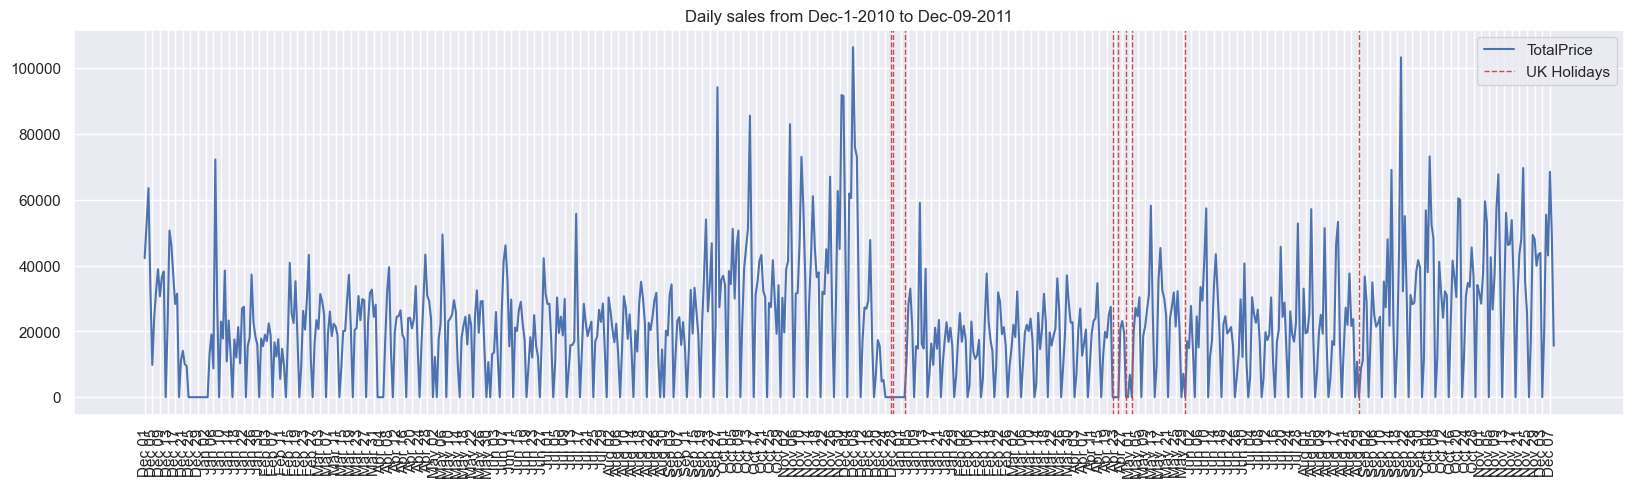

In [31]:
plotSales(sales,'D',4,'Daily')

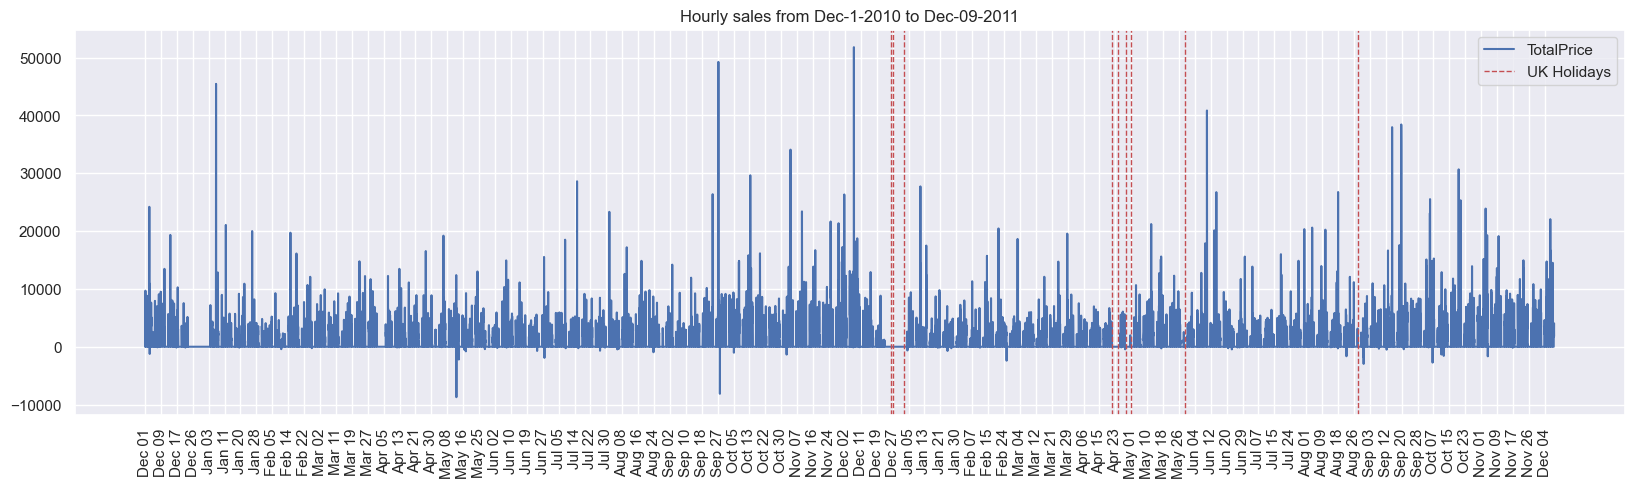

In [37]:
plotSales(sales,'h',200,'Hourly')

C:\Users\Mani_Kandan_Raja\AppData\Local\Temp\ipykernel_14064\4080805269.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



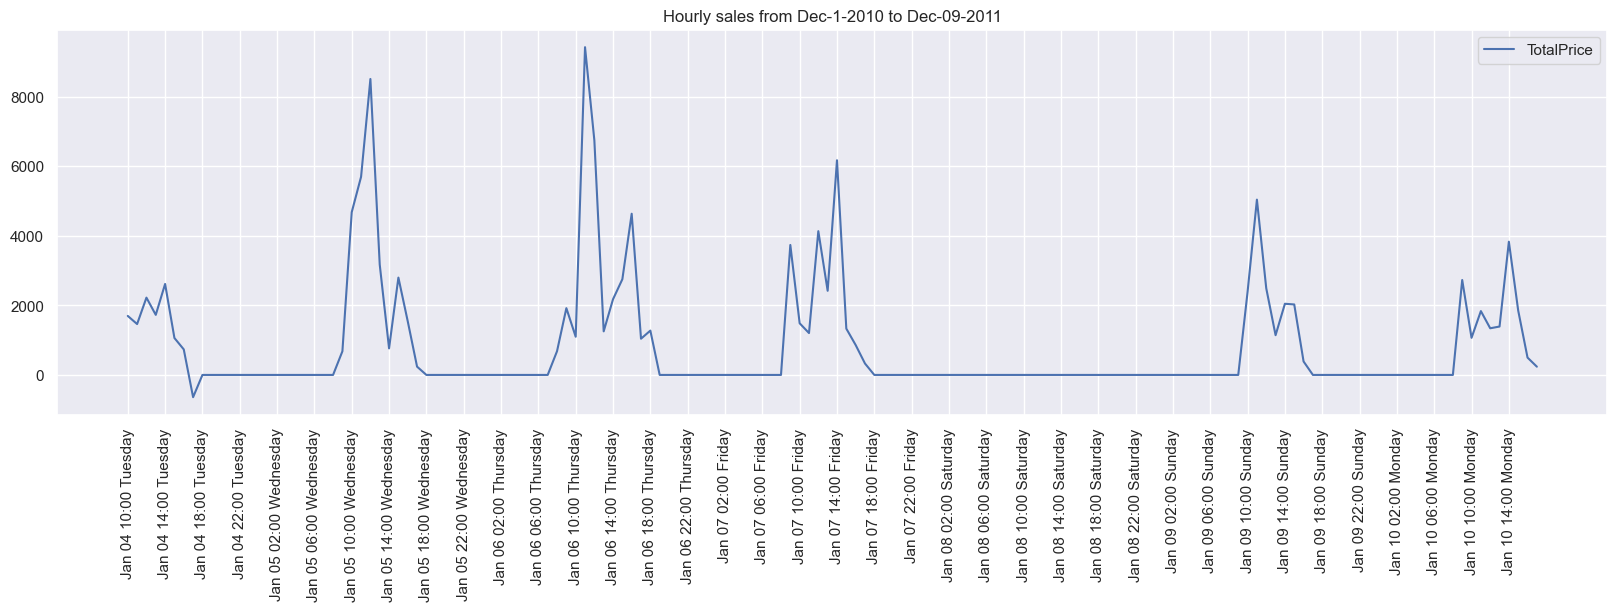

In [39]:
plotSales(sales['2011-01-01':'2011-01-10'],'H',4,'Hourly')

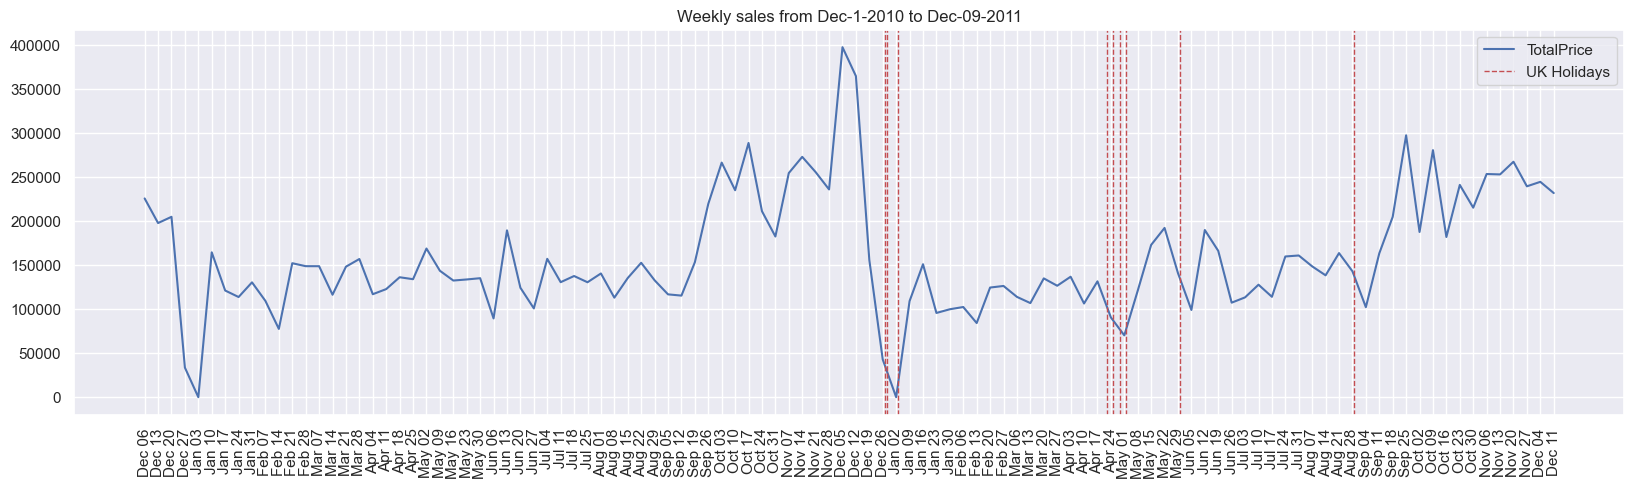

In [40]:
plotSales(sales,'W',1,'Weekly')

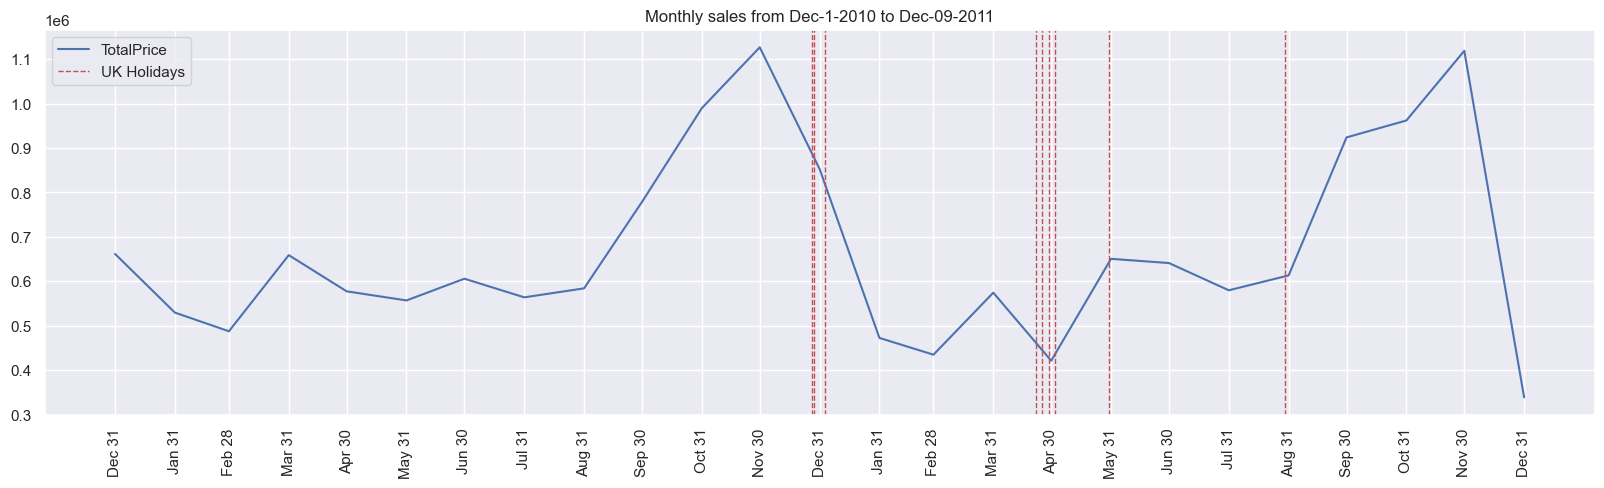

In [42]:
plotSales(sales,'ME',1,'Monthly')

### Observations

1. There is no sales happening on Saturdays.
1. Sales falls down during the holidays
1. There is zero sales happening on Boxing day (Dec 26th) which probably means that the company does not offer any promotions during the holidays/special days.
1. Sales happens only during the working hours - between 8am and 6pm.
1. There is no particular trend seen in monthly and weekly sales. The overall sales has increased through the months.

In [44]:
df.to_csv('orders_data.csv')